**Name:** Trini Kui

**StudentID:** 21204004

# Data Prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #
from sklearn.cluster import AffinityPropagation #
from sklearn import metrics #
from scipy.spatial.distance import cdist #
from sklearn.metrics import silhouette_score#
from sklearn.preprocessing import MinMaxScaler#

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the interval [0,1]

In [2]:
df_original = pd.read_csv("./loans_train_prepared.csv")
df = df_original.drop('Loan_Status_Y', axis=1) 
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)
df.describe()

(number of examples, number of attributes):  (614, 15)


Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
count  614.000000       614.000000  614.000000        614.000000   
mean     0.248100         0.916588    1.076222          0.713355   
std      0.336541         0.412366    0.338744          0.134226   
min      0.000000         0.004634    0.005026          0.025000   
25%      0.000000         0.662440    0.883668          0.750000   
50%      0.000000         0.815365    1.047319          0.750000   
75%      0.333333         1.078246    1.229571          0.750000   
max      1.000000         3.357480    2.461145          1.000000   

       Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
count      614.000000   614.000000  614.000000   614.000000   614.000000   
mean         0.855049     0.796417    0.021173     0.648208     0.004886   
std          0.352339     0.402991    0.144077     0.477919     0.069786   
min          0.000000     0.000000    0.000000     0.000000     0.000000   
25%          1.000000     1.000000    0.000000     0.000000     0.000000   
50%          1.000000     1.000000    0.000000     1.000000     0.000000   
75%          1.000000     1.000000    0.000000     1.000000     0.000000   
max          1.000000     1.000000    1.000000     1.000000     1.000000   

       Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
count         614.000000         614.000000              614.000000   
mean            0.133550           0.052117                0.218241   
std             0.340446           0.222445                0.413389   
min             0.000000           0.000000                0.000000   
25%             0.000000           0.000000                0.000000   
50%             0.000000           0.000000                0.000000   
75%             0.000000           0.000000                0.000000   
max             1.000000           1.000000                1.000000   

       Property_Area_Semiurban  Property_Area_Urban  TotalIncome  
count               614.000000           614.000000   614.000000  
mean                  0.379479             0.328990     0.862686  
std                   0.485653             0.470229     0.428068  
min                   0.000000             0.000000     0.005599  
25%                   0.000000             0.000000     0.597383  
50%                   0.000000             0.000000     0.783902  
75%                   1.000000             1.000000     1.035796  
max                   1.000000             1.000000     3.207353

I dropped "Loan_Status_Y" from the dataset because it's the predicted outcome/labels. I don't want to include it in my K-means algorithm. 

# Task 2 - K-Means Clustering

- Plot the sum of squared distances from the data points (in loans_train_prepared.csv) to the centers of the k-means clusters for various values of k. Use the Elbow method to pick the best value of k. Attempt also another method for determining the best value of k. Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means. Aim at producing meaningful clustering.
- Use at least two different methods for visualising the clustering. Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).
- **Exemplary:** k-Means clustering computed. Two methods for finding the best value of k employed correctly. Clusters clearly characterised in a markdown cell.

## Elbow Method

### Optimal K

Elbow SSE


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


{1: 1185.0150227061679, 2: 998.1172848864604, 3: 876.2272570136192, 4: 789.6364544886826, 5: 732.1552050089151, 6: 679.6867568066884, 7: 651.9427944833792, 8: 612.5792881383636, 9: 593.3457626238047, 10: 574.8964461092611, 11: 554.2912306064566, 12: 537.0272349325417, 13: 517.8545599187848, 14: 503.1675911554079, 15: 486.7962159535155, 16: 476.872321625764, 17: 462.0605178863849, 18: 456.3892726768448, 19: 441.1020069580683, 20: 426.46072813622953, 21: 415.3810262789853, 22: 406.7928467136312, 23: 400.50856625455634, 24: 389.5105861567135, 25: 384.03190244943784, 26: 376.32109344516743, 27: 370.00348573151484, 28: 363.3599473799536, 29: 358.88480625775395, 30: 350.9343794430651, 31: 345.9303440460896, 32: 338.88514095243625, 33: 332.37375231461436, 34: 326.07744629239903, 35: 319.2569666739419, 36: 320.8912880688856, 37: 311.6606042291525, 38: 309.8646653907139, 39: 304.32048669594616, 40: 298.212711670973, 41: 291.9059452950637, 42: 286.3185433319508, 43: 284.00828539774295, 44: 281.0

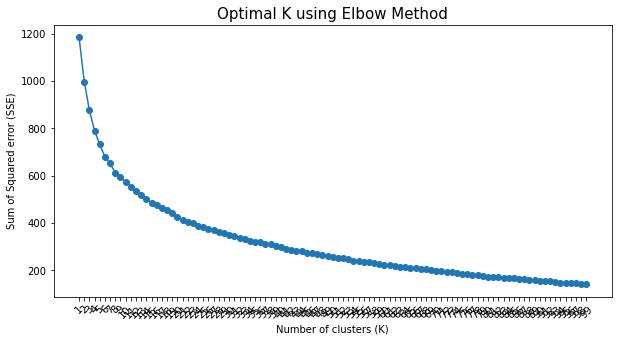

In [3]:
elbow_sse = {}
random_num = 27
elbow_range = range(1,100)

print('Elbow SSE')
for k in elbow_range: #iterates through k = 1 to 10
    kmeans = KMeans(n_clusters=k, n_init=15, max_iter=500, random_state=random_num).fit(data) 
        #random_state to make it easier to compare to other method
    elbow_sse[k] = kmeans.inertia_ #intertia =  sum of squared distances of samples to their closest cluster center
print(elbow_sse)

#plot the SSE for Elbow method
plt.figure(figsize=(10,5))
plt.plot(list(elbow_sse.keys()),list(elbow_sse.values()), marker = 'o')
plt.title('Optimal K using Elbow Method', size=15)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared error (SSE)')
plt.xticks(ticks = elbow_range, rotation = 45)
plt.show()

The elbow method is not very effective in this case as there's no clear "elbow". This might be due to several reasons like large differences in attribute ranges (ie. not scaled properly). In the df.describe() we see that that's not the case since the min and max values are quite small.

Since the elbow method looks at the diminishing returns by increasing k, we will graph this below to find the optimal k by calculating the change in SSE as we increase k. Basically calculating the slope since change in x-axis is 1 each time, we just calculate the difference in y-axis. 

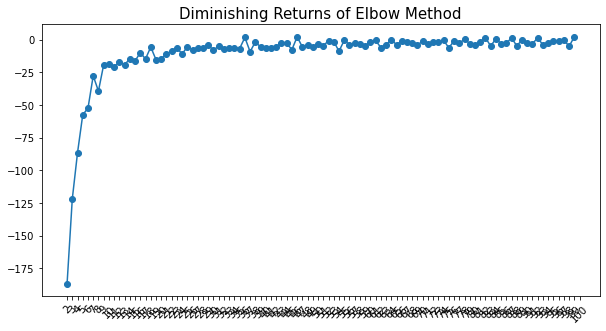

In [4]:
sse_difference = {}
for i in elbow_sse.keys():
    if i == 1:
        sse_difference[i] = 0
    else:
        previous = i - 1
        sse_difference[i] = elbow_sse[i] - elbow_sse[previous] #calculates diminishing returns  
sse_difference.pop(1) #remove the first key and value since it's just 0
        
plt.figure(figsize=(10,5))
plt.title('Diminishing Returns of Elbow Method', size=15)
plt.plot(list(sse_difference.keys()),list(sse_difference.values()), marker = 'o')
plt.xticks(ticks = range(2,101), rotation=45)
plt.show()

Still a bit hard to see, so we'll find the first smallest minimum below. 

In [5]:
print(sse_difference)

min_return = (0,500) #(index, sse_difference value)
for ele in sse_difference:
    if abs(sse_difference[ele]) < min_return[1]:
        min_return = (ele,abs(sse_difference[ele]))
    elif abs(sse_difference[ele]) >= min_return[1]:
        break
        
print('')
print(min_return)
print(elbow_sse[min_return[0]])

{2: -186.89773781970746, 3: -121.89002787284119, 4: -86.59080252493663, 5: -57.481249479767484, 6: -52.46844820222668, 7: -27.743962323309233, 8: -39.363506345015594, 9: -19.23352551455889, 10: -18.449316514543625, 11: -20.605215502804526, 12: -17.263995673914906, 13: -19.172675013756816, 14: -14.686968763376967, 15: -16.371375201892363, 16: -9.923894327751498, 17: -14.811803739379116, 18: -5.671245209540075, 19: -15.287265718776553, 20: -14.641278821838739, 21: -11.079701857244231, 22: -8.588179565354096, 23: -6.284280459074864, 24: -10.997980097842856, 25: -5.47868370727565, 26: -7.710809004270402, 27: -6.317607713652592, 28: -6.643538351561233, 29: -4.475141122199659, 30: -7.9504268146888535, 31: -5.004035396975496, 32: -7.045203093653356, 33: -6.511388637821881, 34: -6.296306022215333, 35: -6.820479618457114, 36: 1.6343213949436972, 37: -9.230683839733103, 38: -1.7959388384385875, 39: -5.544178694767766, 40: -6.107775024973137, 41: -6.306766375909319, 42: -5.587401963112882, 43: -2

The optimal diminishing return is when k = 7, when the SSE is 651.94.

### Visualizing Clusters

In [6]:
elbowopt = min_return[0]  # get optimal k for elbow method

# fit Kmeans with opt k using elbow method
clustered_data_sklearn = cluster.KMeans(
    n_clusters=elbowopt, n_init=30, max_iter=500, random_state=random_num).fit(data)

# append clusters to dataset
data_and_centers = np.r_[data, clustered_data_sklearn.cluster_centers_]

Using from the Lab 3...

In [7]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple','red','grey','cyan','magenta'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=300, label='cluster center')

    _ = plt.title(title)
    _ = plt.legend(ncol=5, loc="upper right", bbox_to_anchor=(1, -0.2))
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

#### MDS Visualization

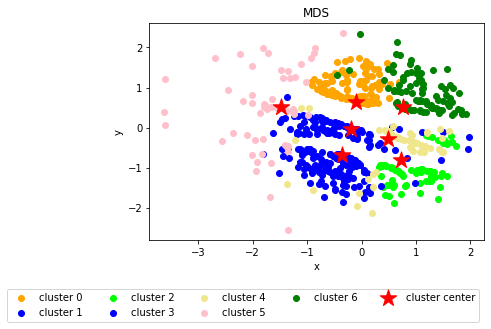

In [8]:
# project dataset and clusters to 2D
XYcoordinates = manifold.MDS(n_components=2, random_state=random_num).fit_transform(
    data_and_centers)  # n_components for # of dimensions (2D)

# plot
clustering_scatterplot(points=XYcoordinates[:-elbowopt, :], labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-elbowopt:, :], title='MDS')

#### TSNE Visualization

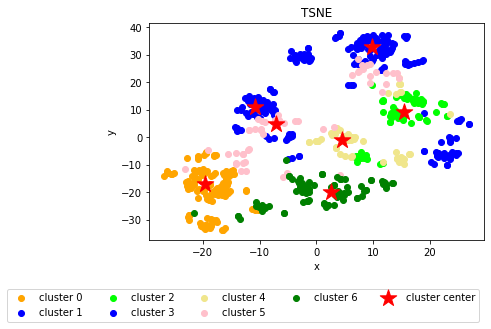

In [9]:
XYcoordinates = manifold.TSNE(n_components=2, random_state=random_num).fit_transform(data_and_centers)

clustering_scatterplot(points=XYcoordinates[:-elbowopt, :], labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-elbowopt:, :], title='TSNE')

#### **ADD 3rd Visualization**

### Cluster Analysis

In [10]:
kmeans_elbow_df = df.copy()
kmeans_elbow_df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=kmeans_elbow_df.index)
kmeans_elbow_df.groupby('cluster').mean()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
cluster                                                              
0          0.360882         0.846143    1.086966          0.723140   
1          0.336182         0.818890    1.033689          0.688675   
2          0.078704         0.744707    0.864806          0.729167   
3          0.292929         0.797858    1.064691          0.699242   
4          0.077381         0.980976    1.080341          0.745536   
5          0.396226         1.841518    1.623525          0.698113   
6          0.097222         0.827604    0.980412          0.723438   

         Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
cluster                                                                      
0              0.892562     0.975207    0.000000     1.000000     0.000000   
1              0.854701     0.965812    0.000000     1.000000     0.000000   
2              0.875000     0.444444    0.013889     0.000000     0.013889   
3              0.818182     0.919192    0.030303     1.000000     0.000000   
4              0.821429     0.910714    0.000000     0.000000     0.000000   
5              0.849057     0.792453    0.075472     0.811321     0.000000   
6              0.854167     0.437500    0.052083     0.187500     0.020833   

         Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
cluster                                                                 
0                 0.115702           0.024793                0.206612   
1                 0.085470           0.051282                0.247863   
2                 0.027778           0.069444                0.166667   
3                 0.141414           0.060606                0.313131   
4                 0.178571           0.053571                0.267857   
5                 0.358491           0.056604                0.037736   
6                 0.135417           0.062500                0.208333   

         Property_Area_Semiurban  Property_Area_Urban  TotalIncome  
cluster                                                             
0                       1.000000             0.000000     0.821443  
1                       0.000000             1.000000     0.800296  
2                       0.000000             0.805556     0.562223  
3                       0.000000             0.000000     0.790841  
4                       0.000000             0.160714     0.947714  
5                       0.301887             0.339623     1.805896  
6                       1.000000             0.000000     0.719813

#### **ADD CLUSTER CHARACTERISTIC CONCLUSIONS HERE**

NOTE TO SELF, add more cluster colours...
fix xticks in the graphs

## Silhouette Coefficient Method

### Optimal K

Silhouette Score
{2: 0.16980807355676666, 3: 0.1725460167588254, 4: 0.17599090986125906, 5: 0.17977886642953148, 6: 0.18398053100054834, 7: 0.19027358500707658, 8: 0.19486132547059412, 9: 0.20106654479437594, 10: 0.18234397061405103, 11: 0.1956233013161004, 12: 0.197918923763551, 13: 0.20693291720276283, 14: 0.1958629992083256, 15: 0.21821066513093537, 16: 0.1986746654984496, 17: 0.21235034545312678, 18: 0.2184634508287773, 19: 0.2103533088134302, 20: 0.22548331232848787, 21: 0.22499085097505986, 22: 0.22948890964315627, 23: 0.2304423681370446, 24: 0.22249874420151336, 25: 0.22216282174312887, 26: 0.22960938740496742, 27: 0.21494925748532998, 28: 0.22163369843156566, 29: 0.2390573133903821, 30: 0.23128468097726032, 31: 0.22889503990773186, 32: 0.23142253412030817, 33: 0.24270463267410436, 34: 0.23495345173374715, 35: 0.25304126884774936, 36: 0.24118904298867197, 37: 0.2468197587178929, 38: 0.24181102426500153, 39: 0.23814746160038933, 40: 0.25752107938868485, 41: 0.25057628373420177, 4

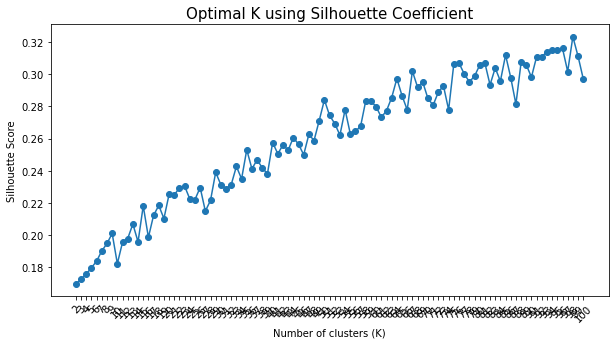

(98, 0.3232010809035226)

In [11]:
silhouette_coeff = {}
cluster_name = []
cluster_category = []
silhouette_range = range(2,101)

print('Silhouette Score')
for k in silhouette_range:
    kmeans = KMeans(n_clusters=k, n_init=15, max_iter=500, random_state=random_num).fit(data)
    cluster_name.append('k_'+str(k))
    cluster_category.append(kmeans.labels_)
    #silhouette_coeff[k] = np.average(np.min(cdist(x, kmeans.cluster_centers_, 'euclidean'), axis=1))
    silhouette_coeff[k] = silhouette_score(data,kmeans.labels_,metric='euclidean')
    #print('k = ',k,': ',silhouette_coeff[k])
print(silhouette_coeff)
    
#create df of kmeans clustering results
cluster_category = np.array(cluster_category).transpose()
kmeans_silhouette_df = pd.DataFrame(data = cluster_category, columns = cluster_name)
#display(kmeans_silhouette_df)

#plot the SSE for Silhouette Coefficient method
plt.figure(figsize=(10,5))
plt.plot(list(silhouette_coeff.keys()),list(silhouette_coeff.values()), marker = 'o')
plt.title('Optimal K using Silhouette Coefficient', size=15)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(ticks = silhouette_range, rotation = 45)
plt.show()

max(silhouette_coeff.items(), key=lambda x: x[1]) 

The optimal k is k = 15, when the highest silhouette coefficient is 0.218.

### Visualizing Clusters

In [12]:
key, value = max(silhouette_coeff.items(), key=lambda x: x[1])
silhouetteopt = key  # get optimal k for elbow method

# fit Kmeans with opt k using silhouette method
clustered_data_sklearn = cluster.KMeans(n_clusters=silhouetteopt, n_init=30, max_iter=500, random_state=random_num).fit(data)

# append clusters to dataset
data_and_centers = np.r_[data, clustered_data_sklearn.cluster_centers_]

#### MDS Visualization

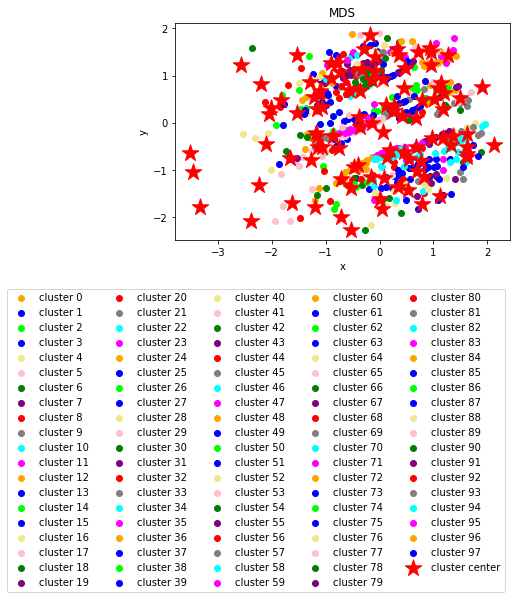

In [13]:
XYcoordinates = manifold.MDS(n_components=2, random_state=random_num).fit_transform(data_and_centers)  

clustering_scatterplot(points=XYcoordinates[:-silhouetteopt, :], labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-silhouetteopt:, :], title='MDS')

#### TSNE Visualization

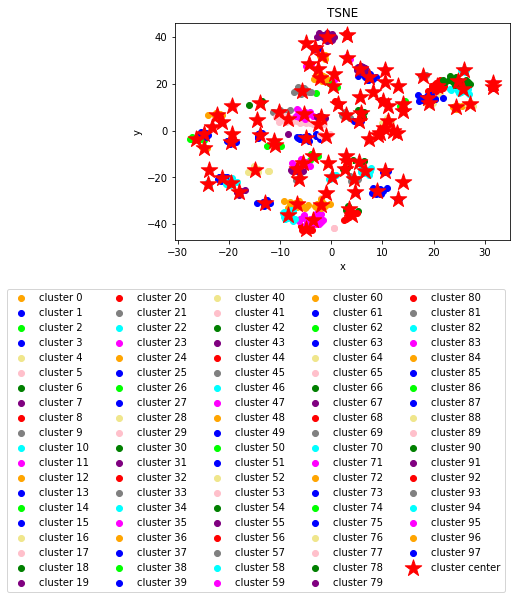

In [14]:
XYcoordinates = manifold.TSNE(n_components=2, random_state=random_num).fit_transform(data_and_centers)

clustering_scatterplot(points=XYcoordinates[:-silhouetteopt, :], labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-silhouetteopt:, :], title='TSNE')

#### **ADD 3rd Visualization**

### Cluster Analysis

In [15]:
kmeans_silh_df = df.copy()
kmeans_silh_df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=kmeans_silh_df.index)
kmeans_silh_df.groupby('cluster').mean()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
cluster                                                              
0          0.688889         1.111409    1.469491          0.716667   
1          0.025641         0.982396    1.185084          0.701923   
2          0.777778         0.816664    1.045905          0.708333   
3          0.083333         0.874471    1.124933          0.750000   
4          0.166667         0.760023    0.917927          0.632500   
...             ...              ...         ...               ...   
93         0.666667         0.777494    0.844485          0.750000   
94         0.250000         0.567406    0.927976          0.750000   
95         0.833333         0.748171    0.941243          0.750000   
96         0.166667         0.706212    1.019993          0.625000   
97         0.000000         1.927205    1.471066          0.750000   

         Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
cluster                                                                      
0              0.933333          1.0         0.0          1.0     0.000000   
1              1.000000          1.0         0.0          0.0     0.076923   
2              1.000000          1.0         0.0          1.0     0.000000   
3              1.000000          1.0         0.0          0.0     0.000000   
4              1.000000          1.0         0.0          0.0     0.000000   
...                 ...          ...         ...          ...          ...   
93             0.000000          1.0         0.0          0.0     0.000000   
94             1.000000          1.0         0.0          1.0     0.000000   
95             1.000000          1.0         0.0          1.0     0.000000   
96             0.000000          1.0         0.0          0.0     0.000000   
97             1.000000          0.0         0.0          0.0     0.000000   

         Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
cluster                                                                 
0                     0.00                0.0                    0.00   
1                     0.00                0.0                    0.00   
2                     0.00                0.0                    1.00   
3                     0.00                0.0                    0.00   
4                     0.10                0.0                    1.00   
...                    ...                ...                     ...   
93                    0.00                0.0                    0.00   
94                    1.00                0.0                    0.00   
95                    0.00                1.0                    0.00   
96                    0.25                0.0                    0.75   
97                    1.00                0.0                    1.00   

         Property_Area_Semiurban  Property_Area_Urban  TotalIncome  
cluster                                                             
0                            1.0                  0.0     1.155055  
1                            0.0                  1.0     0.951748  
2                            0.0                  0.0     0.644213  
3                            0.0                  0.0     0.933447  
4                            1.0                  0.0     0.695547  
...                          ...                  ...          ...  
93                           0.0                  0.0     0.494083  
94                           0.0                  1.0     0.677754  
95                           0.0                  1.0     0.721401  
96                           0.0                  1.0     0.743307  
97                           1.0                  0.0     1.744005  

[98 rows x 15 columns]

#### **ADD CLUSTER CHARACTERISTIC CONCLUSIONS HERE**

# Task 3 - Affinity Propagation Clustering

- Use another clustering algorithm (from the ones available in scikit-learn) for the loans_train_prepared dataset and an appropriate manifold-learning technique to visualise it.
- Discuss the differences between the k-Means clustering and the clustering found by the second algorithm you have tried in words (max 250 words in a markdown cell) and by visualising the clusterings with an appropriate manifold-learning technique.

**Exemplary:**
- *Second clustering algorithm:* Second clustering algorithm attempted successfully and compared to k-Means. Sufficient exploration of the parameters of the second clustering algorithm.
- *Quality of visualization of clusterings:* Expressive MDS or t-SNE visualisation. An attempt to use other techniques besides MDS and t-SNE.

In [20]:
aff_prop = AffinityPropagation(damping = 0.75,max_iter=500, random_state=random_num).fit(data) 
afprop_centers_indices = aff_prop.cluster_centers_indices_ #indices of cluster centers
afprop_centers = aff_prop.cluster_centers_ #cluster centers
afprop_label = aff_prop.labels_ #assigns cluster # label to each data point
afpropopt = len(afprop_centers_indices) # number of clusters
data_and_centers = np.r_[data, aff_prop.cluster_centers_]
print('Number of clusters: ',afpropopt)

Number of clusters:  55


## MDS Visualization

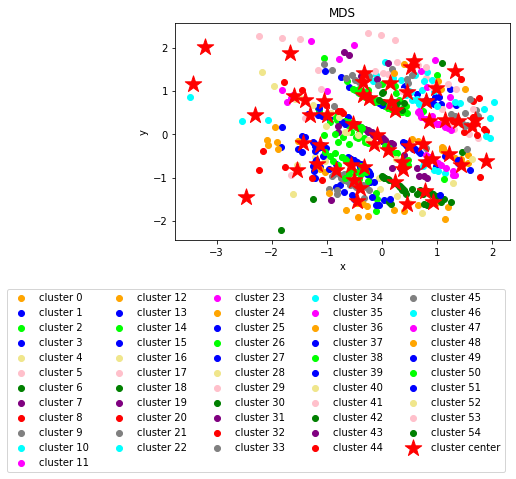

In [17]:
XYcoordinates = manifold.MDS(n_components=2, random_state=random_num).fit_transform(data_and_centers)  

clustering_scatterplot(points=XYcoordinates[:-afpropopt, :], labels=afprop_label,
                       centers=XYcoordinates[-afpropopt:, :], title='MDS')

## TSNE Visualization

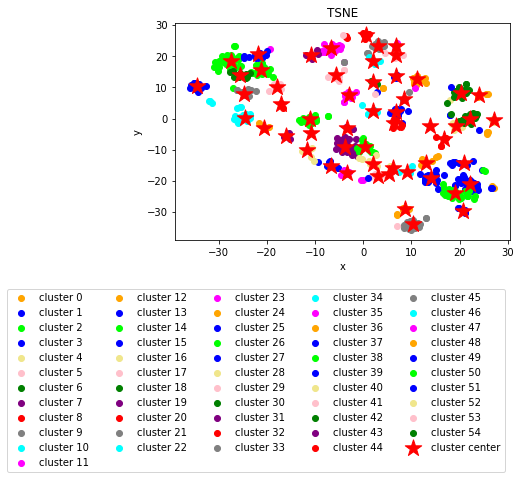

In [18]:
XYcoordinates = manifold.TSNE(n_components=2, random_state=random_num).fit_transform(data_and_centers)

clustering_scatterplot(points=XYcoordinates[:-afpropopt, :], labels=afprop_label,
                       centers=XYcoordinates[-afpropopt:, :], title='TSNE')

## **ADD 3rd Visualization**

## Affinity Propogation vs Kmeans